<b><font color="SteelBlue" size="+3">Classifiez automatiquement des biens de consommation</font></b>

# Introduction

Ce notebook est la suite de celui sur le traitement des descriptions. On récupère les données nettoyées pour les catégories des produits.

## Imports

In [1]:
# Chargement des librairies
# Standard
import os

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
from matplotlib.image import imread
from PIL import Image as PilImage

# Deep Learning - TensorFlow/Keras
os.environ["KERAS_BACKEND"] = "torch"
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess_inceptionresnetv2
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet201
from tensorflow.keras.utils import to_categorical

# Custom Modules
from Deveau_Estelle_4_IMG_func_042024 import *

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1_notebook_txt_faisabilite_042024.ipynb',
 'Deveau_Estelle_2_NLP_func_042024.py',
 'Deveau_Estelle_3_notebook_img_faisabilite_042024.ipynb',
 'Deveau_Estelle_4_IMG_func_042024.py',
 'Deveau_Estelle_5_notebook_img_classification_042024.ipynb',
 'model_best.weights.h5',
 'model_densenet201_best.weights.h5',
 'model_inceptionresnetv2_best.weights.h5',
 'model_vgg16_best.weights.h5',
 'OC_projet6.pptx',
 'pythonProject',
 'svg',
 'Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb',
 'Weather_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0.ipynb',
 '__pycache__']

In [3]:
os.listdir("data/Cleaned/")

['data.csv']

In [4]:
path     = "./data/Cleaned/"
filename = "data.csv"

In [5]:
data = pd.read_csv(path + filename)

In [6]:
path     = "./data/Sources/Images/"
list_photos = [file for file in os.listdir(path)]
print(len(list_photos))

1050


# Classification supervisée

In [7]:
cols_to_keep = ['uniq_id', 'product_category']
df = data[cols_to_keep]
df.head(5)

,uniq_id,product_category
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing


In [8]:
image_paths = [f"{path}{uid}.jpg" for uid in df['uniq_id']]

# Encodage des catégories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(df['product_category'])
category_names = label_encoder.classes_

## Séparation des jeux de données (train, val, test)

In [9]:
y = to_categorical(categories_encoded, 7)

In [10]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [11]:
# Diviser les chemins d'image et les étiquettes
paths_train, paths_test, y_train, y_test = train_test_split(image_paths, y, test_size=0.2, random_state=42)
paths_train, paths_val, y_train, y_val = train_test_split(paths_train, y_train, test_size=0.25, random_state=42)

In [12]:
y_test[:5]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [13]:
# Dictionnaire pour stocker les résultats
results = {}

## Evaluation des modèles sélectionnés

In [14]:
# Définir le seuil à un niveau supérieur spécifique
PilImage.MAX_IMAGE_PIXELS = 100000000

### VGG16

In [15]:
# Préparation des données
X_train_vgg16, X_val_vgg16, X_test_vgg16 = prepare_data(paths_train, paths_val, paths_test, preprocess_vgg16,
                                                        target_size=(224, 224, 3))

In [19]:
# Création du modèle
model_vgg16 = create_model_fct(base_model_name='VGG16')

NameError: name 'GlobalAveragePooling2D' is not defined

In [25]:
# Entraînement du modèle
model_vgg16, history_vgg16, duration_vgg16 = train_model(model_vgg16, X_train_vgg16, y_train, X_val_vgg16, y_val,
                                                         model_save_path="./model_vgg16_best.weights.h5")

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3127 - loss: 8.3045
Epoch 1: val_loss improved from inf to 1.52543, saving model to ./model_vgg16_best.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.3218 - loss: 8.1130 - val_accuracy: 0.7143 - val_loss: 1.5254
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6855 - loss: 1.9999
Epoch 2: val_loss improved from 1.52543 to 1.37777, saving model to ./model_vgg16_best.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6838 - loss: 1.9959 - val_accuracy: 0.7238 - val_loss: 1.3778
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7642 - loss: 1.5396
Epoch 3: val_loss improved from 1.37777 to 1.12954, saving model to ./model_vgg16_best.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.7644 - loss: 1.5270 - val_accuracy: 0.7619 - val_loss: 1.1295
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8079 - loss: 0.9348
Epoch 4: val_loss improved from 1

In [26]:
# Évaluation du modèle
loss_vgg16, accuracy_vgg16, ari_score_vgg16 = evaluate_model(model_vgg16, X_train_vgg16, y_train, X_val_vgg16,
                                                             y_val, X_test_vgg16, y_test, best_weights_path="./model_vgg16_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 1.0000 - loss: 0.0055
Training Accuracy after last epoch: 1.0000

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8284 - loss: 0.8318
Test Accuracy after last epoch: 0.8286

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8050 - loss: 0.7624
Validation Accuracy (best): 0.7905
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8156 - loss: 0.6237
Test Accuracy (best): 0.8381
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Adjusted Rand Index (ARI): 0.6803


### InceptionResNetV2

In [16]:
# Préparation des données
X_train_inceptionresnetv2, X_val_inceptionresnetv2, X_test_inceptionresnetv2 = prepare_data(paths_train, paths_val,
                                                                                            paths_test, preprocess_inceptionresnetv2,
                                                                                            target_size=(299, 299, 3))

In [17]:
# Création du modèle
model_inceptionresnetv2 = create_model_fct(base_model_name='InceptionResNetV2')

In [26]:
# Entraînement du modèle
model_iresnetv2, history_iressnetv2, duration_iresnetv2 = train_model(model_inceptionresnetv2, X_train_inceptionresnetv2,
                                                                      y_train, X_val_inceptionresnetv2, y_val,
                                                                      model_save_path="./model_inceptionresnetv2_best.weights.h5")

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 2.9824e-04
Epoch 1: val_loss improved from inf to 0.70349, saving model to ./model_inceptionresnetv2_best.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 1.0000 - loss: 3.0304e-04 - val_accuracy: 0.8762 - val_loss: 0.7035
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0022
Epoch 2: val_loss did not improve from 0.70349
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8714 - val_loss: 0.7962
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0018
Epoch 3: val_loss did not improve from 0.70349
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8714 - val_loss: 0.7635
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 1.0000 - loss: 8.4617e-04
Epoch 4: val_loss did not improve from 0.70349
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 1.0000 - loss

In [27]:
# Évaluation du modèle
loss_inceptionresnetv2, accuracy_inceptionresnetv2, ari_score_inceptionresnetv2 = evaluate_model(model_inceptionresnetv2,
                                                                                                 X_train_inceptionresnetv2,
                                                                                                 y_train, X_val_inceptionresnetv2,
                                                                                                 y_val, X_test_inceptionresnetv2,
                                                                                                 y_test,
                                                                                                 best_weights_path="./model_inceptionresnetv2_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 585ms/step - accuracy: 1.0000 - loss: 1.7691e-04
Training Accuracy after last epoch: 1.0000

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.8964 - loss: 0.8570
Test Accuracy after last epoch: 0.8857

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - accuracy: 0.8750 - loss: 0.7187
Validation Accuracy (best): 0.8714
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 604ms/step - accuracy: 0.9039 - loss: 0.8645
Test Accuracy (best): 0.8905
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 587ms/step
Adjusted Rand Index (ARI): 0.7828


### DenseNet201

In [31]:
# Préparation des données
X_train_densenet201, X_val_densenet201, X_test_densenet201 = prepare_data(paths_train, paths_val, paths_test,
                                                                          preprocess_densenet201, target_size=(224, 224, 3))


In [32]:
# Création du modèle
model_densenet201 = create_model_fct(base_model_name='DenseNet201')


In [33]:
# Entraînement du modèle
model_densenet201, history_densenet201, duration_densenet201 = train_model(model_densenet201, X_train_densenet201, y_train,
                                                                           X_val_densenet201, y_val,
                                                                           model_save_path="./model_densenet201_best.weights.h5")


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3242 - loss: 2.1634
Epoch 1: val_loss improved from inf to 0.63651, saving model to ./model_densenet201_best.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.3391 - loss: 2.1171 - val_accuracy: 0.8000 - val_loss: 0.6365
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7646 - loss: 0.7404
Epoch 2: val_loss improved from 0.63651 to 0.57505, saving model to ./model_densenet201_best.weights.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.7665 - loss: 0.7339 - val_accuracy: 0.8238 - val_loss: 0.5750
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8691 - loss: 0.4546
Epoch 3: val_loss did not improve from 0.57505
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8670 - loss: 0.4574 - val_accuracy: 0.8095 - val_loss: 0.6241
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8667 - loss: 0.4203
Epoch 4: val_loss improved from 0.57505 to 0.53255, saving model to ./mo

In [34]:
# Évaluation du modèle
loss_densenet201, accuracy_densenet201, ari_score_densenet201 = evaluate_model(model_densenet201, X_train_densenet201,
                                                                               y_train, X_val_densenet201,
                                                                                y_val, X_test_densenet201, y_test,
                                                                               best_weights_path="./model_densenet201_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9978 - loss: 0.0341
Training Accuracy after last epoch: 0.9952

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8499 - loss: 0.4418
Test Accuracy after last epoch: 0.8476

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8318 - loss: 0.5117
Validation Accuracy (best): 0.8286
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8647 - loss: 0.4418
Test Accuracy (best): 0.8667
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step
Adjusted Rand Index (ARI): 0.7275


### Comparaison des résultats

In [31]:
# Initialisation de la liste pour stocker les résultats
data_results = []

# Fonction pour ajouter les résultats d'un modèle au DataFrame
def add_results(model_name, loss, accuracy, ari_score, duration):
    metrics = ['Loss', 'Accuracy', 'Adjusted Rand Score', 'Duration (en heures)']
    scores = [loss, accuracy, ari_score, (duration/3600)]
    for metric, score in zip(metrics, scores):
        data_results.append({
            'Model': model_name,
            'Metric': metric,
            'Score': score
        })

In [32]:
#add_results('VGG16', loss_vgg16, accuracy_vgg16, ari_score_vgg16, duration_vgg16)
add_results('InceptionResNetV2', loss_inceptionresnetv2, accuracy_inceptionresnetv2, ari_score_inceptionresnetv2, duration_iresnetv2)
#add_results('DenseNet201', loss_densenet201, accuracy_densenet201, ari_score_densenet201, duration_densenet201)

data_metrics = pd.DataFrame(data_results)

In [ ]:
plot_model_performance(data_results)

# Optimisation

## Hyper paramètres

In [18]:
# Entraînement du modèle
best_model, duration_best = test_hyperparameters(model_inceptionresnetv2, X_train_inceptionresnetv2, y_train, X_val_inceptionresnetv2,
                                                 y_val, model_save_path="./model_best.weights.h5")

Testing with learning_rate=0.001, batch_size=32, epochs=20


Finished 0.001, 32, 20 with val_accuracy=0.8904761672019958, duration=115.38544249534607
Testing with learning_rate=0.001, batch_size=32, epochs=30
Finished 0.001, 32, 30 with val_accuracy=0.8809523582458496, duration=169.45667815208435
Testing with learning_rate=0.001, batch_size=64, epochs=20
Finished 0.001, 64, 20 with val_accuracy=0.8857142925262451, duration=979.776927947998
Testing with learning_rate=0.001, batch_size=64, epochs=30
Finished 0.001, 64, 30 with val_accuracy=0.8857142925262451, duration=1402.7076394557953
Testing with learning_rate=0.0001, batch_size=32, epochs=20
Finished 0.0001, 32, 20 with val_accuracy=0.8809523582458496, duration=309.90447473526
Testing with learning_rate=0.0001, batch_size=32, epochs=30
Finished 0.0001, 32, 30 with val_accuracy=0.8809523582458496, duration=471.1766777038574
Testing with learning_rate=0.0001, batch_size=64, epochs=20
Finished 0.0001, 64, 20 with val_accuracy=0.8761904835700989, duration=1000.1392502784729
Testing with learning_r

In [19]:
# Évaluation du modèle
loss_best, accuracy_best, ari_score_best = evaluate_model(best_model,
                                                          X_train_inceptionresnetv2,
                                                          y_train, X_val_inceptionresnetv2,
                                                          y_val, X_test_inceptionresnetv2,
                                                          y_test, best_weights_path="none")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.8786 - loss: 0.7332
Validation Accuracy (best): 0.8762
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.9000 - loss: 0.8628
Test Accuracy (best): 0.8905
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 562ms/step
Adjusted Rand Index (ARI): 0.7829


In [33]:
add_results('InceptionResNetV2(HP)', loss_best, accuracy_best, ari_score_best, duration_best)
data_metrics = pd.DataFrame(data_results)

In [34]:
data_metrics.head(15)

,Model,Metric,Score
0,InceptionResNetV2,Loss,1.021757
1,InceptionResNetV2,Accuracy,0.890476
2,InceptionResNetV2,Adjusted Rand Score,0.782753
3,InceptionResNetV2,Duration (en heures),0.167930
4,InceptionResNetV2(HP),Loss,1.013269
5,InceptionResNetV2(HP),Accuracy,0.890476
6,InceptionResNetV2(HP),Adjusted Rand Score,0.782883
7,InceptionResNetV2(HP),Duration (en heures),0.032052


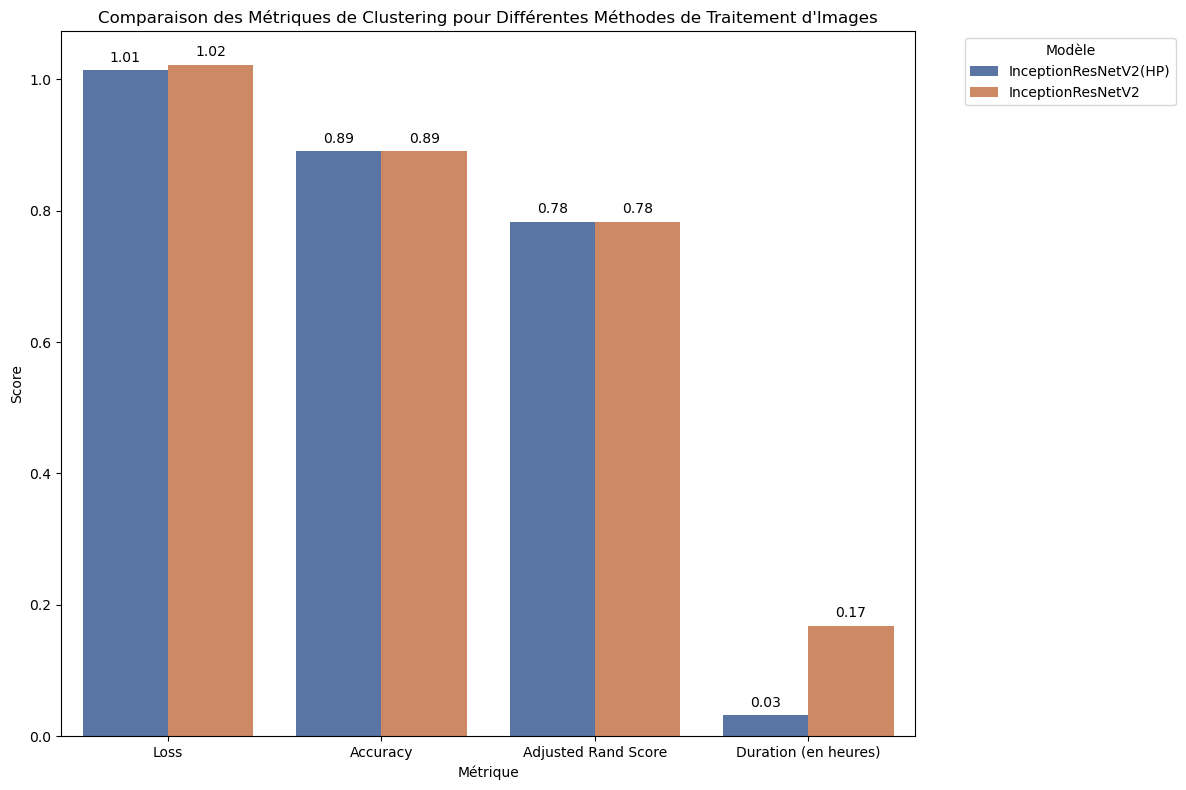

In [36]:
plot_model_performance(data_metrics)

## Data Augmentation